In [1]:
%pip install seaborn

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

Data Exploration

In [3]:
#read data
data=pd.read_csv("iris-1.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
print(data['Species'].value_counts()['Iris-setosa'])
print(data['Species'].value_counts()['Not-Iris-setosa'])

50
100


Data Cleaning

In [6]:
 # Data of Species is converted into Binary Data
df_one = pd.get_dummies(data["Species"])

#join tables 
df_two = pd.concat((df_one, data), axis=1) 
df_two.head(100)

,Iris-setosa,Not-Iris-setosa,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,1,0,2,4.9,3.0,1.4,0.2,Iris-setosa
2,1,0,3,4.7,3.2,1.3,0.2,Iris-setosa
3,1,0,4,4.6,3.1,1.5,0.2,Iris-setosa
4,1,0,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...,...,...
95,0,1,96,5.7,3.0,4.2,1.2,Not-Iris-setosa
96,0,1,97,5.7,2.9,4.2,1.3,Not-Iris-setosa
97,0,1,98,6.2,2.9,4.3,1.3,Not-Iris-setosa
98,0,1,99,5.1,2.5,3.0,1.1,Not-Iris-setosa


In [7]:
# Species column is dropped
df_two = df_two.drop(["Species"], axis=1)

#want Not-iris-setosa to be zero 
df_two = df_two.drop(["Not-Iris-setosa"], axis=1)

#Make new species colomn
df = df_two.rename(columns={"Iris-setosa": "Species"})


In [8]:
df.head(100)

,Species,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,1,5.1,3.5,1.4,0.2
1,1,2,4.9,3.0,1.4,0.2
2,1,3,4.7,3.2,1.3,0.2
3,1,4,4.6,3.1,1.5,0.2
4,1,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
95,0,96,5.7,3.0,4.2,1.2
96,0,97,5.7,2.9,4.2,1.3
97,0,98,6.2,2.9,4.3,1.3
98,0,99,5.1,2.5,3.0,1.1


SVM Model

In [9]:
features = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

X = df[features]
y = df['Species']


#train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=32) #109


#Create a svm Classifier
svm_model = svm.SVC(kernel='linear') # Linear Kernel

#Train the model 
svm_model.fit(X_train, y_train)

#Predict for test dataset
y_pred = svm_model.predict(X_test)

In [10]:
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105,)


Assessing the model performance

In [11]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Recall: ", recall_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Precision: ", precision_score(y_test, y_pred))

Accuracy:  1.0
Recall:  1.0
Precision:  1.0


Storing the weights and the bias of the model

In [12]:
w = svm_model.coef_[0]           #weights of svm model -- 4 elements
b = svm_model.intercept_[0] # b consists of 1 element

#calculateing x points
x0_points = np.linspace(X_train.iloc[:,0].min(), X_train.iloc[:,0].max(), 200)    
x1_points = np.linspace(X_train.iloc[:,1].min(), X_train.iloc[:,1].max(), 200)    
x2_points = np.linspace(X_train.iloc[:,2].min(), X_train.iloc[:,2].max(), 200)    
x3_points = np.linspace(X_train.iloc[:,3].min(), X_train.iloc[:,3].max(), 200)    

#calculating y points
y0_points = -((w[1]* x1_points) + (w[2]* x2_points) + (w[3]* x3_points) + b)/w[0] 
y1_points = -((w[0]* x0_points) + (w[2]* x2_points) + (w[3]* x3_points) + b)/w[1] 
y2_points = -((w[0]* x0_points) + (w[1]* x1_points) + (w[3]* x3_points) + b)/w[2] 
y3_points = -((w[0]* x0_points) + (w[1]* x1_points) + (w[2]* x2_points) + b)/w[3] 

Possible combinations: 0,1; 0,2; 0,3; 1,2; 1,3; 2,3

0 and 2 

Text(0.5, 1.0, 'SepalLengthCm and PetalLengthCm')

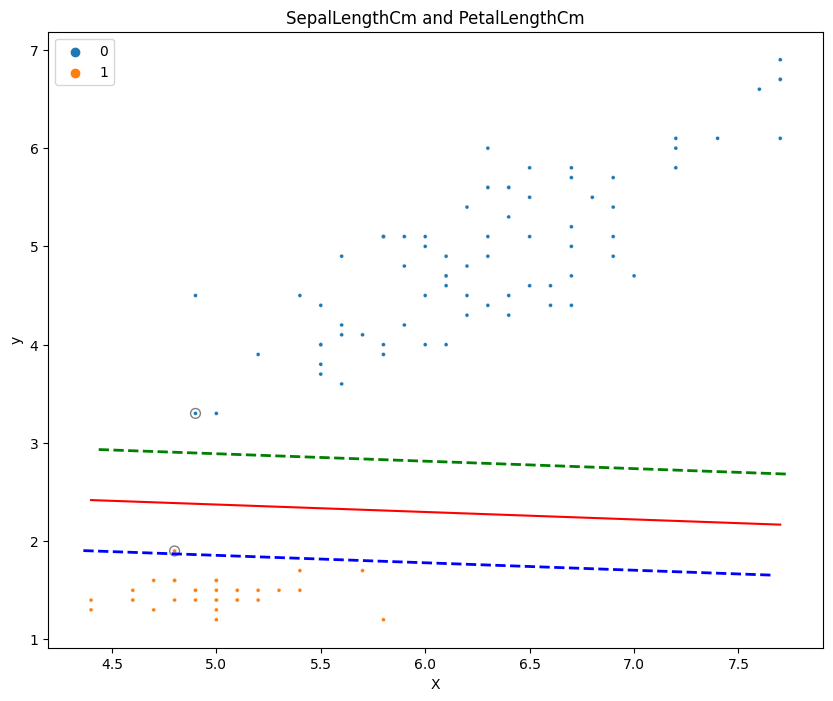

In [13]:
#Plotting using 0 and 2

plt.figure(figsize=(10, 8))

#choosing the variables to plot
my_dict = {'X':X_train.iloc[:,0].ravel(),'y':X_train.iloc[:,2].ravel()}

#scatter plot
sns.scatterplot(data = my_dict, 
                x = "X", 
                y = "y", 
                hue = y_train.values.ravel(),
                s = 8);


# Encircle support vectors
plt.scatter(svm_model.support_vectors_[:, 0],
            svm_model.support_vectors_[:, 2], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

#plotting decision boundary
plt.plot(x0_points, y2_points, c='r');


#unit vector -- magnitude 
w_hat = svm_model.coef_[0] / (np.sqrt(np.sum(svm_model.coef_[0] ** 2)))

# margin:
margin = 1 / np.sqrt(np.sum(svm_model.coef_[0] ** 2) + b)

# Calculate points of the margin lines:
decision_boundary_points = np.array(list(zip(x0_points, y2_points)))
points_of_line_above = decision_boundary_points + w_hat[[0,2]] * margin
points_of_line_below = decision_boundary_points - w_hat[[0,2]] * margin


# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

plt.title("SepalLengthCm and PetalLengthCm")


Plotting using 1 and 2

Text(0.5, 1.0, 'SepalWidthCm and PetalLengthCm')

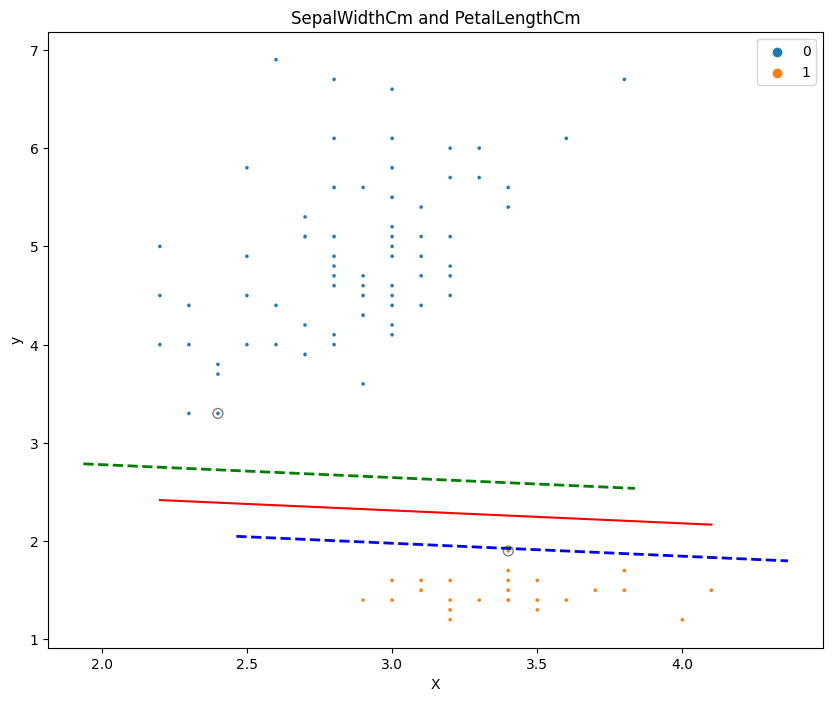

In [14]:
#Plotting using 1 and 2

plt.figure(figsize=(10, 8))

#choosing the variables to plot
my_dict = {'X':X_train.iloc[:,1].ravel(),'y':X_train.iloc[:,2].ravel()}

#scatter plot
sns.scatterplot(data = my_dict, 
                x = "X", 
                y = "y", 
                hue = y_train.values.ravel(),
                s = 8);

# Encircle support vectors
plt.scatter(svm_model.support_vectors_[:, 1],
            svm_model.support_vectors_[:, 2], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

#plotting decision boundary
plt.plot(x1_points, y2_points, c='r');


#unit vector -- magnitude 
w_hat = svm_model.coef_[0] / (np.sqrt(np.sum(svm_model.coef_[0] ** 2))+ b) 

# margin:
margin = 1 / np.sqrt(np.sum(svm_model.coef_[0] ** 2)) 


# Calculate points of the margin lines:
decision_boundary_points = np.array(list(zip(x1_points, y2_points)))
points_of_line_above = decision_boundary_points + w_hat[1:3] * margin 
points_of_line_below = decision_boundary_points - w_hat[1:3] * margin 


# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

plt.title("SepalWidthCm and PetalLengthCm")


Plotting using 2 and 3

Text(0.5, 1.0, 'PetalLengthCm and PetalWidthCm')

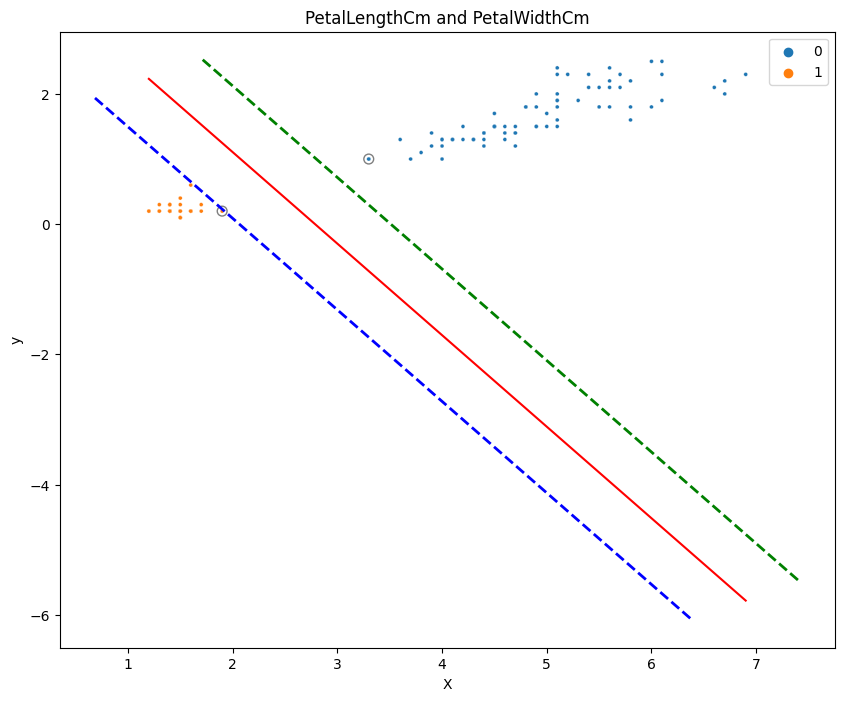

In [15]:
#Plotting using 2 and 3

plt.figure(figsize=(10, 8))

#choosing the variables to plot
my_dict = {'X':X_train.iloc[:,2].ravel(),'y':X_train.iloc[:,3].ravel()}

#scatter plot
sns.scatterplot(data = my_dict, 
                x = "X", 
                y = "y", 
                hue = y_train.values.ravel(),
                s = 8);


# Encircle support vectors
plt.scatter(svm_model.support_vectors_[:, 2],
            svm_model.support_vectors_[:, 3], 
            s=50, 
            facecolors='none', 
            edgecolors='k', 
            alpha=.5);

#plotting decision boundary
plt.plot(x2_points, y3_points, c='r');


#unit vector -- magnitude 
w_hat = svm_model.coef_[0] / (np.sqrt(np.sum(svm_model.coef_[0] ** 2)))

# margin:
margin = 1 / np.sqrt(np.sum(svm_model.coef_[0] ** 2) + b)


# Calculate points of the margin lines:
decision_boundary_points = np.array(list(zip(x2_points, y3_points)))
points_of_line_above = decision_boundary_points + w_hat[2:4] * margin
points_of_line_below = decision_boundary_points - w_hat[2:4] * margin

# Blue margin line above
plt.plot(points_of_line_above[:, 0], 
         points_of_line_above[:, 1], 
         'b--', 
         linewidth=2)

# Green margin line below
plt.plot(points_of_line_below[:, 0], 
         points_of_line_below[:, 1], 
         'g--',
         linewidth=2)

plt.title("PetalLengthCm and PetalWidthCm")
